# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Ghita Aisha Rahmasari
- **Email:** ghitaaishar@gmail.com
- **ID Dicoding:** itsghita

## Menentukan Pertanyaan Bisnis

1. Bagaimana ketepatan estimasi waktu pengiriman barang hingga sampai ke pelanggan?
2. Bagaimana distribusi persebaran pelanggan yang melakukan pemesanan berdasarkan negara bagian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/zerogravty/submission/refs/heads/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/zerogravty/submission/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- In this analysis process, 2 types of data taken from the E-Commerce Dataset are used, namely customers_dataset and orders_dataset.
- The dataset used is imported from raw github.
- Customers_dataset and orders_dataset have one column with the same parameter, that is customer_id.

### Assessing Data

#### Menilai Tabel customers_df

In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Tabel orders_df

In [8]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**

Based on the assessment of the customers_df data, it can be seen that:
- The data type used is appropriate: 1 integer and 4 objects (strings)
- There are no missing values because all columns amount to 99441 data
- No duplication of data
- There is no inaccurate value based on checking the statistical parameters

Based on the assessment of the orders_df data, it can be seen that:
- There are 5 columns with inappropriate **data types**, namely order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date which should be datetime data type.
- There are **missing values** in 3 columns, namely order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date.There are no missing values because all columns amount to 99441 data
- No duplication of data
- There is no inaccurate value based on checking the statistical parameters

### Cleaning Data

#### Membersihkan Tabel customers_df

**Insight:**
  
- Based on the review that has been carried out at the Assessing Data stage, it is known that in the customers_df table there is no data that must be cleaned.

#### Membersihkan Tabel orders_df

Type Data

In [12]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
     
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [13]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Missing Value

In [14]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [15]:
orders_df.dropna(axis=0, inplace=True)

In [16]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- The previous incorrect data type in 5 columns has been changed to datetime.
- Missing values are cleaned using the dropping method by deleting all rows that have missing values. This method was chosen because based on the business questions made at the beginning, the things to be analyzed are about the distribution spread and the accuracy of the estimated delivery time. This means that the data detected with missing values (or in other words, the data of orders with cancelled status) will not affect the final result.

## Exploratory Data Analysis (EDA)

### Explore orders_df

In [17]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [18]:
orders_df['order_delivered_customer_date_only'] = orders_df['order_delivered_customer_date'].dt.date
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0       

In [19]:
orders_df['order_estimated_delivery_date_only'] = orders_df['order_estimated_delivery_date'].dt.date
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0       

In [20]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_only,order_estimated_delivery_date_only
count,96461,96461,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,645,445
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,2018-08-27,2017-12-20
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,446,507
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,NaN,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN


In [21]:
delivery_time = orders_df["order_estimated_delivery_date_only"] - orders_df["order_delivered_customer_date_only"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())

orders_df["delivery_time"] = round(delivery_time/86400)

In [22]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_only,order_estimated_delivery_date_only,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,645,445,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,2018-08-27,2017-12-20,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,446,507,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,NaN,NaN,11.875577
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,NaN,-188.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,NaN,NaN,7.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,NaN,NaN,12.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,NaN,NaN,17.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,147.000000


In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   order_id                            96461 non-null  object        
 1   customer_id                         96461 non-null  object        
 2   order_status                        96461 non-null  object        
 3   order_purchase_timestamp            96461 non-null  datetime64[ns]
 4   order_approved_at                   96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date        96461 non-null  datetime64[ns]
 6   order_delivered_customer_date       96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date       96461 non-null  datetime64[ns]
 8   order_delivered_customer_date_only  96461 non-null  object        
 9   order_estimated_delivery_date_only  96461 non-null  object        
 10  delivery_time              

**Insight:**
- At this stage, the relationship between the order_delivered_customer_date and order_estimated_delivery_date columns is found where we can get how long the delivery time is to find out whether the order was sent according to the estimated time.
- Because only date data is needed from the order_delivered_customer_date and order_estimated_delivery_date columns, the hour information will be omitted. This is done by creating new columns, namely order_delivered_customer_date_only and order_estimated_delivery_date_only, which contain delivery date data only.
- After that, another new column is created called delivery_time which contains the difference between delivery time and estimated time for the order reach their destination.

### Explore orders_df dan customers_df

#### Menggabungkan data orders_df dan customer_df

In [24]:
all_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_only,order_estimated_delivery_date_only,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-10,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08-07,2018-08-13,6.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-17,2018-09-04,18.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12-02,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-16,2018-02-26,10.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [25]:
all_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_only,order_estimated_delivery_date_only,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,96461,96461,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000,96461,96461.000000,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,645,445,NaN,93342,NaN,4085,27
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,2018-08-27,2017-12-20,NaN,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,446,507,NaN,15,NaN,15044,40489
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,NaN,NaN,11.875577,NaN,35198.925825,NaN,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,NaN,-188.000000,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,NaN,NaN,7.000000,NaN,11355.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,NaN,NaN,12.000000,NaN,24436.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,NaN,NaN,17.000000,NaN,59056.000000,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,147.000000,NaN,99980.000000,NaN,NaN


##### Jumlah Customer Berdasarkan Negara Bagian

In [26]:
statecount_df = all_df.groupby(by="customer_state").order_id.nunique().reset_index()
statecount_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
statecount_df

,customer_state,order_count
0,AC,80
1,AL,397
2,AM,145
3,AP,67
4,BA,3256
5,CE,1278
6,DF,2080
7,ES,1995
8,GO,1957
9,MA,716


**Insight:**
  
- At this stage, the merging of tables between orders_df and customers_df aims to determine the relationship between the order_id column in the orders_df data and the customer_city column in the customers_df data.
- Separating the order_id and customer_city columns and sorting them ascending

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana ketepatan estimasi waktu pengiriman barang hingga sampai ke pelanggan?

In [27]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_only,order_estimated_delivery_date_only,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-10,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08-07,2018-08-13,6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-17,2018-09-04,18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12-02,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-16,2018-02-26,10.0


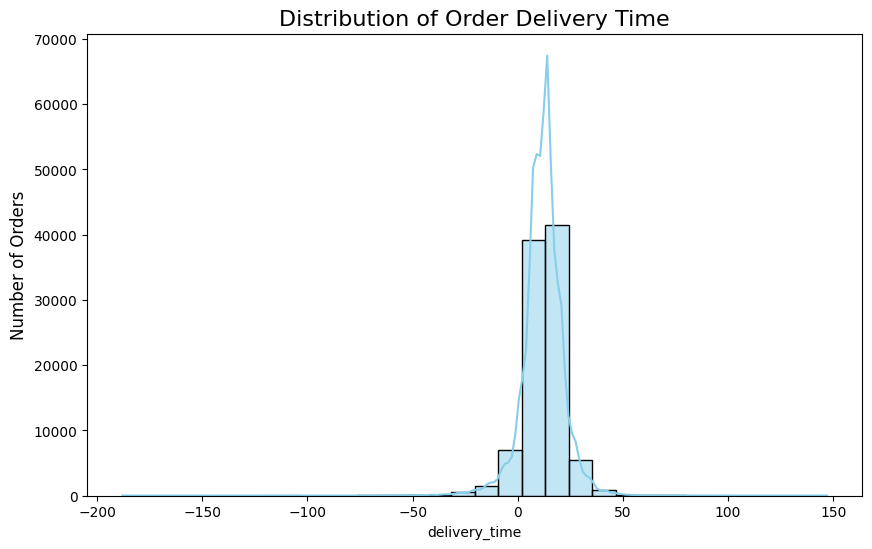

In [28]:
plt.figure(figsize=(10, 6))

sns.histplot(data=orders_df, x="delivery_time", bins=30, kde=True, color="skyblue")

plt.title('Distribution of Order Delivery Time', fontsize=16)
plt.ylabel('Number of Orders', fontsize=12)

plt.show()

**Insight:**
- The data from the delivery_time column will be used to determine the distribution of delivery distribution
- The graph form used is a histogram. This graph was chosen because the histogram can illustrate how the distribution of delivery spreads to find out how much the level of timeliness in order delivery is.

### Pertanyaan 2: Bagaimana distribusi persebaran pelanggan yang melakukan pemesanan berdasarkan negara bagian?

In [29]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_only,order_estimated_delivery_date_only,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-10,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08-07,2018-08-13,6.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-17,2018-09-04,18.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12-02,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-16,2018-02-26,10.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [30]:
statecount_df = all_df.groupby(by="customer_state").order_id.nunique().reset_index()
statecount_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
statecount_df

,customer_state,order_count
0,AC,80
1,AL,397
2,AM,145
3,AP,67
4,BA,3256
5,CE,1278
6,DF,2080
7,ES,1995
8,GO,1957
9,MA,716


C:\Users\Asus\AppData\Local\Temp\ipykernel_3960\3908823339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="customer_state", data=statecount_df.sort_values(by="order_count", ascending=False).head(14), palette=colors, ax=ax[0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_3960\3908823339.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="customer_state", data=statecount_df.sort_values(by="order_count", ascending=True).head(13), palette=colors, ax=ax[1])
C:\Users\Asus\AppData\Local\Temp\ipykernel_3960\3908823339.py:11: UserWarning: The palette list has more values (14) than needed (13), which may not be intended.
  sns.barplot(x="order_count", y="cu

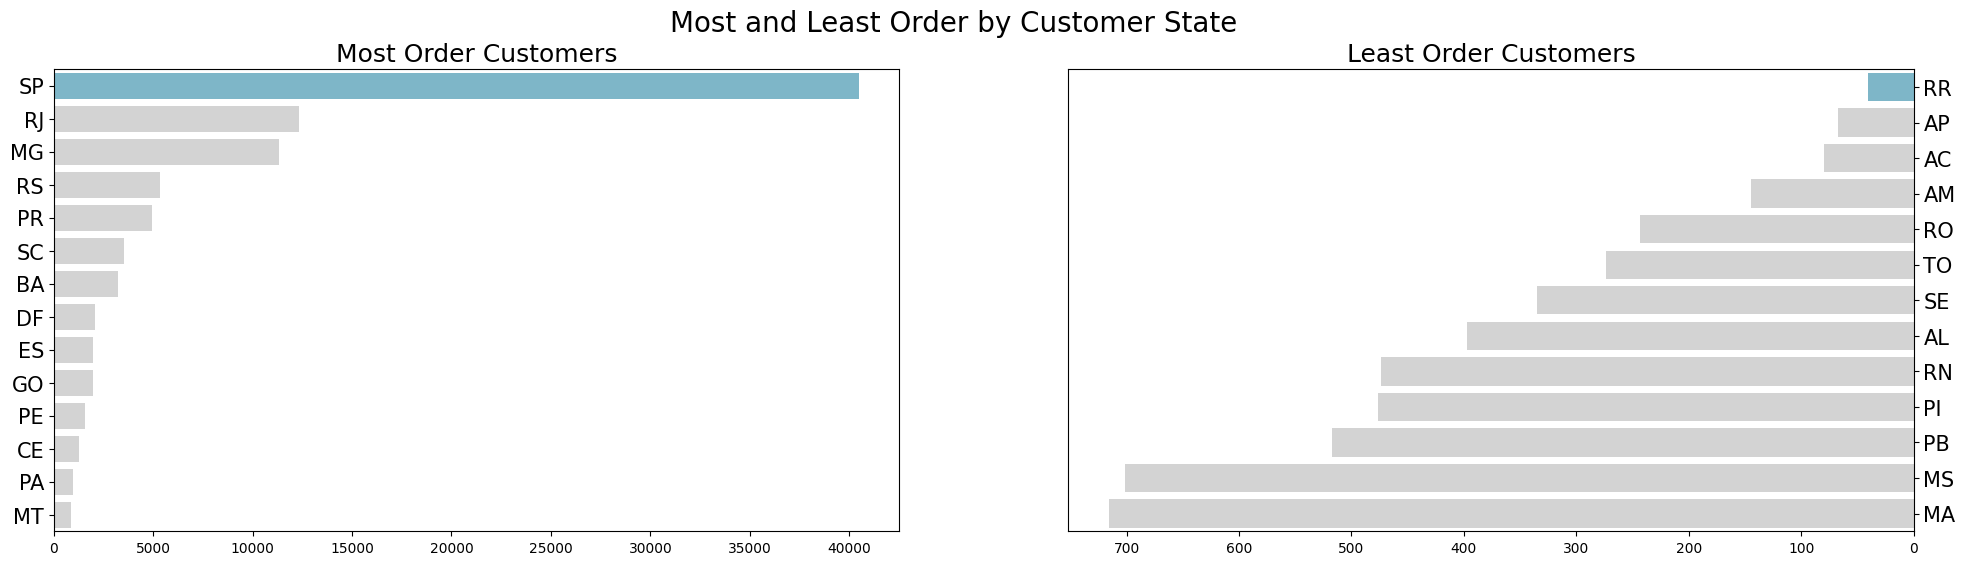

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_count", y="customer_state", data=statecount_df.sort_values(by="order_count", ascending=False).head(14), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Order Customers", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_count", y="customer_state", data=statecount_df.sort_values(by="order_count", ascending=True).head(13), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Order Customers", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Most and Least Order by Customer State", fontsize=20)
plt.show()

**Insight:**
- The data used are customer_state and order_count data to find out the distribution of customer distribution based on state
- The graph used is a horizontal bar chart because it can illustrate the frequency of distribution of customer states well and clearly.

## Conclusion

- Conclution pertanyaan 1: Bagaimana ketepatan estimasi waktu pengiriman barang hingga sampai ke pelanggan?
Based on the analysis above, it is obtained that the delivery time of each order is different. Starting from the range of -188 to 12. A negative sign indicates that there is a delay in the delivery of orders, while a positive number indicates the delivery of orders that arrive on time. From the graph, it can be seen that the distribution tends to the right, meaning that the delivery of orders to the customer is more on time than late. These results can be used as an evaluation of the timeliness of the delivery of orders.

- Conclution pertanyaan 2: Bagaimana distribusi persebaran pelanggan yang melakukan pemesanan berdasarkan negara bagian?
Based on the analysis above, the number of customers who place orders by state is obtained. From the graph, it can be seen that the states of SP, RJ, and MG are the 3 states with the most customers placing orders, while RR, AP, and AC are the 3 states with the least customers placing orders. These results can be used to develop policies related to sales optimization through advertising, promotions, etc.

In [34]:
all_df.to_csv("all_data.csv", index=False)